In [12]:
import torch
import pickle
import gzip
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

In [13]:
file = gzip.open("mnist.pkl.gz")
((x_train, y_train), (x_valid, y_valid), _ )=pickle.load(file, encoding='latin-1')

In [14]:
x_train[0].shape

(784,)

In [15]:
28*28

784

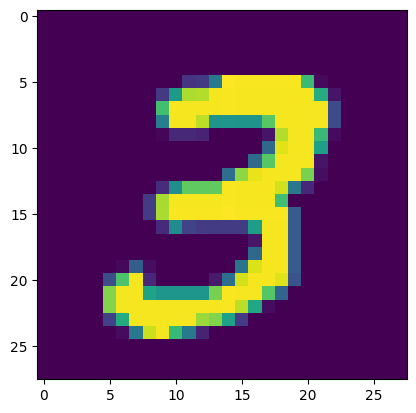

In [16]:
sample_image=x_train[7]
sample_image=sample_image.reshape((28, 28))
plt.imshow(sample_image)

In [17]:
y_train[7]

3

# Überlegungen zur Netzarchitektur

InputNeuronen: 784
OutputNeuronen: 10

    - Neuron 0 --> wenn der Wert hier am höchsten ist. Dann soll es eine 0 sein
    - Neuron 1 --> wenn der Wert hier am höchsten ist. Dann soll es eine 1 sein
    - Neuron 2 --> wenn der Wert hier am höchsten ist. Dann soll es eine 2 sein
    - Neuron 3 --> wenn der Wert hier am höchsten ist. Dann soll es eine 3 sein
    ...


In [18]:
loss = nn.CrossEntropyLoss()

In [19]:
x_train = torch.tensor(x_train, dtype=torch.long)
x_valid = torch.tensor(x_valid, dtype=torch.long)
y_train = torch.tensor(y_train, dtype=torch.long)
y_valid = torch.tensor(y_valid, dtype=torch.long)

# Modell bauen

In [20]:
class MySimpleNN(torch.nn.Module):

    def __init__(self, input_size=784, hidden_size=(400, 650, 900), output_size=10):
        
        super(MySimpleNN, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size[0])
        self.fc2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.fc3 = nn.Linear(hidden_size[1], hidden_size[2])
        self.fc4 = nn.Linear(hidden_size[2], output_size)

        self.bn1 = torch.nn.BatchNorm1d(hidden_size[0])
        self.bn2 = torch.nn.BatchNorm1d(hidden_size[1])
        self.bn3 = torch.nn.BatchNorm1d(hidden_size[2])

    def forward(self, xb):
        z2 = self.fc1(xb)
        a2 = torch.relu(z2)
        a2_bn = self.bn1(a2)

        z3 = self.fc2(a2_bn)
        a3 = torch.relu(z3)
        a3_bn = self.bn2(a3)

        z4 = self.fc3(a3_bn)
        a4 = torch.relu(z4)
        a4_bn = self.bn3(a4)

        y_hat = torch.relu(self.fc4(a4_bn))

        return y_hat




# Training

In [21]:
def get_batch(x, y, batch_size):
    for i in range(0, len(x), batch_size):
        yield (x[i:i+batch_size], y[i:i+batch_size])

In [22]:
model = MySimpleNN()
xb, yb = next(get_batch(x_train, y_train, 64))
print(model(xb))

RuntimeError: mat1 and mat2 must have the same dtype

In [ ]:
model = MySimpleNN()
lr = 0.0001
batch_size = 256

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

def train(xb, yb):
    y_hat = model(xb)
    loss = loss_fn(y_hat, yb)
    loss.backward()
    optimizer.step()
    return loss.item()

losses=[]

for epoch in (range(400)):
    loss_sum = 0

    for xb, yb in get_batch(x_train, y_train, batch_size):
        loss_sum += train(xb, yb)
    loss_epoch = loss_sum / len(x_train)
    losses.append(loss_sum/len(x_train))
    scheduler.step(loss_epoch)
    if epoch % 10 == 0:
        print("Epoch: ", epoch, "Loss: ", loss_epoch, "LR: ", optimizer.param_groups[0]['lr'])

plt.plot(losses)


RuntimeError: mat1 and mat2 must have the same dtype